<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500, height=450>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Перцептрон Розенблатта <br><br>(нейрон с пороговой функцией активации)</b></h2>

---

В данном ноутбуке Вам нужно будет:  

- самостоятельно реализовать класс **`Perceptron()`** -- нейрон пороговой функцией активации
- обучить и протестировать Ваш перцептрон на сгенерированных и реальных данных (файлы с реальными данными помещены в папку /data в этой же директории)
- сравнить качество работы Вашего класса с классом из библиотеки `scikit-learn` (`sklearn.linear_model.Perceptron()`)

<h2 style="text-align: center;"><b>Введение</b></h2>

Почти любой алгоритм машинного обучения, решающий задачу *классификации* или *регрессии*, работает так:

1. (*стадия инициализации*) Задаются его **гиперпараметры**, то есть те величины, которые не "выучиваются" алгоритмом в процессе обучения самостоятельно 
2. (*стадия обучения*) Алгоритм запускается на данных, **обучаясь** на них и меняя свои **параметры** (не путать с *гипер*параметрами) каким-то определённым образом (например, с помощью *метода градиентного спуска* или *метода коррекции ошибки*), исходя из функции потерь (её называют *loss function*). Функция потерь, по сути, говорит, где и как ошибается модель
3.  (*стадия предсказания*) Модель готова, и теперь с помощью неё можно делать **предсказания** на новых объектах

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap  # тут лежат разные штуки для цветовой магии
import numpy as np
import pandas as pd

<h2 style="text-align: center;"><b>Класс Perceptron</b></h2>

В даном разделе будет решаться задача **бинарной классификации** с помощью перцептрона:  
- *Входные данные*: матрица $X$ размера $(n, m)$ и столбец $y$ из нулей и единиц размера $(n, 1)$. Строкам матрицы соответствуют объекты, столбцам - признаки (то есть строка $i$ есть набор признаков (*признаковое описание*) объекта $X_i$).
- *Выходные данные*: столбец $\hat{y}$ из нулей и единиц размера $(n, 1)$ - предсказания алгоритма.

Модель нейрона в биологии и в deep learning:  

![title](http://lamda.nju.edu.cn/weixs/project/CNNTricks/imgs/neuron.png)

\**картинка из http://cs231n.github.io/neural-networks-1/*

Чтобы понять, как мы будем обновлять параметры модели (веса), нужно знать, какую функцию потерь мы оптимизируем (находим минимум). В данном случае мы решаем задачу бинарной классификации (2 класса: 1 или 0), возьмём в качестве функции потерь среднеквадратичную ошибку:  

$$Loss(w, x) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (f(w \cdot X_i) - y_i)^2$$  

Здесь $w \cdot X_i$ - скалярное произведение, а $f(w \cdot X_i)$ - пороговая функция:  

$$
f(z) =
\begin{cases}
1, &\text{если } w \cdot X_i > 0 \\
0, &\text{если } w \cdot X_i \le 0
\end{cases}
$$  

**Примечание:** В формуле предполагается, что $b$ - свободный член - является частью вектора весов: $w_0$. Тогда, если к $X$ приписать слева единичный столбец, в скалярном произведении $b$ будет именно как свободный член (лучше распишите это -- станет понятнее). При реализации класса `Perceptron()` $b$ нужно считать отдельно (чтобы было нагляднее).

** Реализуйте функцию потерь $Loss$: **

In [19]:
def Loss(y_pred, y):
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    return 0.5 * np.mean((y_pred - y) ** 2)
#     return 0.5 * np.mean( (y_pred - y) ** 2 )
# y = np.array([1,2,3])
# y_pred = np.array([2,3,4])

Поскольку у *пороговой функции* не существует производной (вы её график видели? Выглядит он, конечно, простым, но производная таких не любит), то мы не можем использовать градиентный спуск, ведь:  



$$ \frac{\partial Loss}{\partial w} = \frac{1}{n} X^T\left(f(w \cdot X) - y\right)f'(w \cdot X)$$  

где $f^{'}(w \cdot X)$ - в точке 0 посчитать не получится. Но ведь хочется как-то обновлять веса, иначе как обучить алгоритм отличать груши от яблок?  

Поэтому предлагается обновлять так:   

$$w^{j+1} = w^{j} - \alpha\Delta{w^{j}}$$ 

где:  

$$\Delta{w} = \frac{1}{n}X^T(\hat{y} - y) = \frac{1}{n}X^T(f(w^j \cdot X) - y)$$  

(не забудьте, что при $w_0 = b$ признак $x_0$ = 1), где $w \cdot X$ - матричное произведение столбца весов $w$ на матрицу объектов-признаков $X$, а индекс $j$ -- номер итерации градиентного спуска.

Это правило является неким частным случаем градиентного спуска для данного случая (*[правило Хебба](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D0%BB%D1%8C%D1%82%D0%B0-%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE)*, *[метод коррекции ошибки](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8)*).

Теперь, вооружившись всеми формулами и силой духа, нужно написать свой класс **`Perceptron()`**. Уже есть код класса и немного кода реализации. По-максимуму используйте **Numpy** при реализации, т.к. будет проверяться и скорость работы Вашего алгоритма.  

*Примечание*: В коде ниже `y_pred` - это $\hat{y}$ из формул выше

In [13]:
class Perceptron:
    def __init__(self, w=None, b=0):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """
        # Пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w # (m,1)
        self.b = b # (n,1)
        
    def activate(self, x):
        return np.array(x > 0, dtype=np.int64)
#         return (x > 0).astype(int)
        
    def forward_pass(self, X):
        """
        Эта функция рассчитывает ответ перцептрона при предъявлении набора объектов
        :param: X -- матрица объектов размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона 
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred(icted) - предсказанные классы
        y_pred = self.activate(np.dot(X, self.w) + b).reshape(-1, 1)
        # Ваш код здесь
        return y_pred
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        Обновляет значения весов перцептрона в соответствие с этим объектом
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        n = X.shape[0]
        y = np.array(y).reshape(-1, 1)
        self.w += -learning_rate / n * np.dot(X.T, self.activate(np.dot(X,self.w)) - y)
        # Ваш код здесь
    
    def fit(self, X, y, num_epochs=300):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: Loss_values -- вектор значений функции потерь
        """
        self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
        self.b = 0  # смещение (свободный член)
        losses = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X)
            losses.append(Loss(y_pred, y))
            self.backward_pass(X, y, y_pred)
            
        return losses

Класс готов. Посмотрим, правильно ли ведёт себя Ваш перцептрон. Далее идут несколько ячеек с тестовым кодом, Вам нужно просто запустить их и проверить, чтобы результаты запуска совпадали с соответствующими числами из таблиц:

**Проверка forward_pass():**

In [14]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 2., -1.], [3., 4., -3.2]])

perceptron = Perceptron(w, b)
y_pred = perceptron.forward_pass(X.T)
print ("y_pred = " + str(y_pred))

y_pred = [[1]
 [1]
 [0]]


|Должно быть||
|------|-------|
|**y_pred**|[1, 1, 0]|

**Проверка backward_pass():**

In [15]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [6]:
perceptron.backward_pass(X.T, y, y_pred)

print ("w = " + str(perceptron.w))
print ("b = " + str(perceptron.b))

w = [[0.995]
 [1.988]]
b = 2.0


|Должно быть||
|-|-|
|**w**| [[ 0.995], [1.988]] |
|**b**| 2.0 |

Посмотрим, как меняется функция потерь в течение процесса обучения на реальных данных - датасет "Яблоки и Груши":

In [7]:
data = pd.read_csv("./data/apples_pears.csv")

In [8]:
data.head()

yellowness  symmetry  target
0    0.779427  0.257305     1.0
1    0.777005  0.015915     1.0
2    0.977092  0.304210     1.0
3    0.043032  0.140899     0.0
4    0.760433  0.193123     1.0

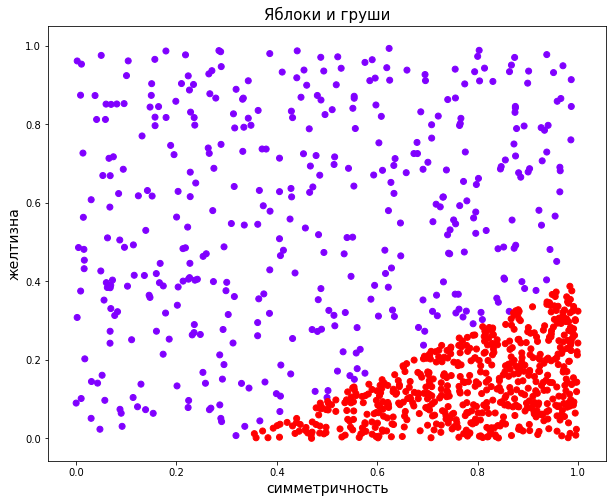

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

**Вопрос:** Какой класс соответствует яблокам (какого они цвета на графике)?

**Ответ:** <Ваш ответ>

Обозначим, что здесь признаки, а что - классы:

In [10]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

**Вывод функции потерь**  
Функция потерь должна убывать и в итоге стать близкой к 0

In [17]:
%%time
perceptron = Perceptron()
losses = perceptron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

ValueError: operands could not be broadcast together with shapes (2,1) (3,1) 

Посмотрим, как перцептрон классифицировал объекты из выборки:

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=perceptron.forward_pass(X).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

<h3 style="text-align: center;"><b>Предсказание пола по голосу</b></h3>

В этой задаче нужно сравнить качество работы Вашего перцептрона и алгоритма из библиотеки `sklearn` на датасете с сайта [Kaggle](https://www.kaggle.com) - [Gender Recognition by Voice](https://www.kaggle.com/primaryobjects/voicegender). В данном датасете в качестве признаков выступают различные звуковые характеристики голоса, а в качестве классов - пол (мужчина/женщина). Подробнее о самих признаках можно почитать [на странице датасета](https://www.kaggle.com/primaryobjects/voicegender) (на английском). Нашей целью пока что является просто протестировать на этих данных два алгоритма.

**! Обратите внимание на имя функции из sklearn - skPerceptron** (это сделано, чтобы не совпадало с именем вашего класса)

In [0]:
import pandas as pd
from sklearn.linear_model import Perceptron as skPerceptron
from sklearn.metrics import accuracy_score

In [0]:
data_path = './data/voice.csv'
data = pd.read_csv(data_path)
data['label'] = data['label'].apply(lambda x: 1 if x == 'male' else 0)

In [0]:
data.head()

In [0]:
# Чтобы перемешать данные. Изначально там сначала идут все мужчины, потом все женщины
data = data.sample(frac=1)

In [0]:
X_train = data.iloc[:int(len(data)*0.7), :-1]  # матрица объекты-признаки
y_train = data.iloc[:int(len(data)*0.7), -1]  # истинные значения пола (мужчина/женщина)

X_test = data.iloc[int(len(data)*0.7):, :-1]  # матрица объекты-признаки
y_test = data.iloc[int(len(data)*0.7):, -1]  # истинные значения пола (мужчина/женщина)

Тут нужно натренировать Ваш перцептрон и перцептрон из `sklearn` на этих данных:

In [0]:
# Ваш код здесь

Сравним доли правильных ответов (на тестовых данных):

In [0]:
print('Точность (доля правильных ответов, из 100%) моего перцептрона: {:d}'.format(accuracy_score(<Ваш код здесь>) * 100))
print('Точность (доля правильных ответов) перцептрона из sklearn: {:.1f} %'.format(accuracy_score(<Ваш код здесь>) * 100))

**Вопрос:** Хорошее ли качество показывает перцептрон? Как Вы думаете, почему? Можете писать любые мысли на этот счёт.

**Ответ:**<Ваш ответ>

### Важно

Стоит понимать, что перцептрон сам по себе не используется в приложениях. Мы продемонстрровали его вам, чтобы вы знали, с чего всё начиналось. На самом деле это просто один нейрон с пороговой функцией активации, который не используется в многослойных нейросетях и каких-либо прикладных задачах, но всё же является хорошим учебным примером, помогающим понять то, как обновляются веса в соответствие с ошибками и перейти к рассмотрению более полезных моделей (нейронов с другими функциями активации).

<h2 style="text-align: center;"><b>Полезные ссылки</b></h2>

1). Lecture Notes Стэнфордского университета: http://cs231n.github.io/neural-networks-1/  
2). [Википедия про перцептрон](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD)